In [1]:
import os
import csv
import numpy as np 
import pickle
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, ceil
from timeit import default_timer as timer
import keras.layers as layers
from keras import Model, Input
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D,\
    MaxPool2D, AvgPool2D, Reshape,\
    LSTM, MaxPooling2D,TimeDistributed,Activation,\
    BatchNormalization, concatenate, AveragePooling2D,\
    GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import load_model
from keras.models import Sequential
from tensorflow.keras.applications import ResNet50,DenseNet121
import math
import random
keras.backend.clear_session()
import json


Using TensorFlow backend.


In [2]:
tf.keras.backend.clear_session()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


data 0


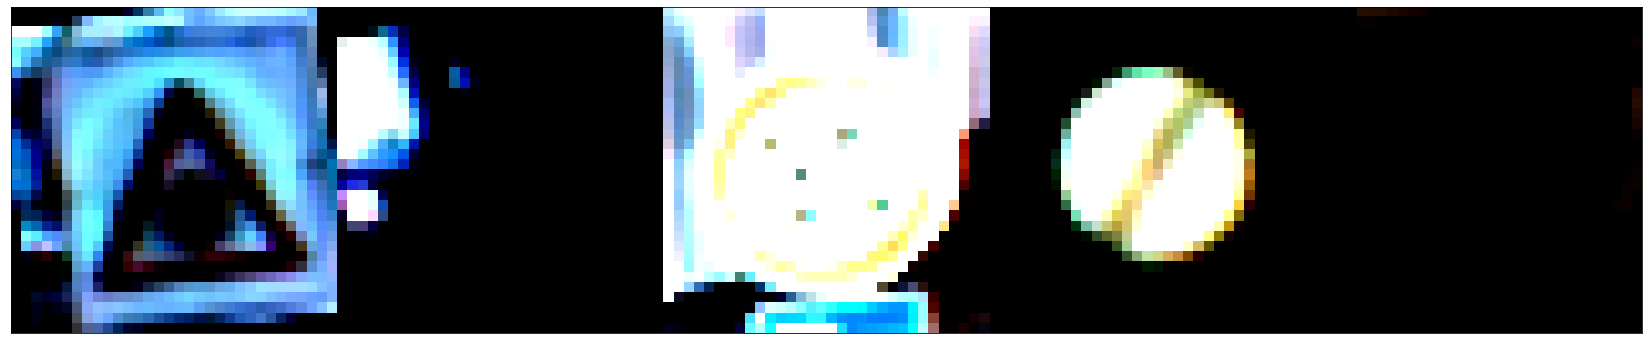

In [3]:
#Initialize List to Append each data file
data=[]
DATA_PATH = '/datasets/home/21/321/ee228sp20ta1/G36/'
#'Different Data Files' for training,  validation adn test
filenames=['processed_data.pickle']
# i=0
def show_data(data, num_exp):
    '''
    Display some random instances
    of input data.
    
    Input:-
    -----
    data :  type(4-D array)
        Input data in the form
        of images
        
    '''
    assert 0<=num_exp<=5

    x=[np.array([i]) for i in np.arange(data.shape[0])]
    rnd_ind = random.choices(x, k = num_exp)
    images = (data[rnd_ind,:,:,:]).squeeze(1)
    h_stack_image =np.hstack(images) # Getting Incorrect Images and Stacking
                                 # them to print in one go
    plt.figure(figsize = (30,6))
    plt.imshow(h_stack_image, cmap='gray')    # Converting into unsigned integers for plt.imshow              
    plt.xticks([])
    plt.yticks([])
        
#Read each data file from filesname
for i,fil in enumerate(filenames):
    #Read Path of the directory of datafiles
    #Use readbyte to read the data
    
    file= os.path.join(DATA_PATH, fil)
    with open(file, 'rb') as f:
        d = pickle.load(f, encoding='latin1')  
        #Append currect data file to data <List>
        data.append(d)
   
        # Converting labels of data into one-hot vector
        data[i]['y_train'] = to_categorical(data[i]['y_train'], num_classes=43)
        data[i]['y_val'] = to_categorical(data[i]['y_val'], num_classes=43)
        data[i]['y_test'] = to_categorical(data[i]['y_test'], num_classes=43)
        
        
        #normalization and transpose to make number of channels at the end

        data[i]['x_train'] = (data[i]['x_train'])
        data[i]['x_val'] = (data[i]['x_val'])
        data[i]['x_test'] = (data[i]['x_test'])
        print('data', i)
        
        show_data(data[i]['x_train'], 5)
        # Showing shape of each data pickle (uncomment if needed)
        '''
        for k, j in data[i].items():
                if k == 'labels':
                   print(k + ':', len(j))
                else: 
                   print(k + ':', j.shape)
        print(i)
        '''
        # Show some random images of each data pickle (uncomment if needed)
        
#         i+=1

In [4]:
import pdb

class Model():
    '''
    Class
       Variables:-
       ---------
       self.input_dim : type(int)
           Number of channels of input
           image of the data e.g rgb image
           has input_dim =3

       self.model : type(keras model)
           Its flexible to be changed

        self.model_name : type(str)
            Type of model to be implemented
    '''
    def __init__(self, input_dim, model_name):
        
        assert input_dim==1 or input_dim==3

        self.input_dim = input_dim
        self.model_name = model_name

        #Model Implementation        
        if(model_name == "RNN" ):
            '''
            RNN implementation
            '''
            batch_size = 64
            row_hidden = 128
            col_hidden = 128
            num_classes = 43
            row, col, pixel = 32,32,3
            
            x = Input(shape=(row, col, pixel))
            encoded_rows = TimeDistributed(LSTM(row_hidden))(x)
            encoded_columns = LSTM(col_hidden)(encoded_rows)
            prediction = Dense(num_classes, activation='softmax')(encoded_columns)
            model = keras.Model(x, prediction)
            self.model = model
            
        elif(model_name == "VGG19" ):
            '''
            VGG19 implementation
            '''
            model = Sequential()
            
            model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), name='block1_conv1'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(64, (3, 3), padding='same', name='block1_conv2'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

            model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv1'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv2'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))


            model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv1'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv2'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv3'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv4'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

            model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv1'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv2'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv3'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv4'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

            model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv1'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv2'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv3'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv4'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(Flatten())

            model.add(Dense(4096))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Dropout(0.5))

            model.add(Dense(4096, name='fc2'))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Dropout(0.5))

            model.add(Dense(43))
            model.add(BatchNormalization())
            model.add(Activation('softmax'))
            
            self.model = model
        
        elif (model_name == "GoogleNet"):
            '''
            GoogleNet implementation
            '''

            def inception_module(x,
                         filters_1x1,
                         filters_3x3_reduce,
                         filters_3x3,
                         filters_5x5_reduce,
                         filters_5x5,
                         filters_pool_proj,
                         name=None):
                '''
                GoogleNet inception
                module. Takes in the
                different filters and
                returns concatenation
                of output of all 
                convolution.
                '''

                conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)

                conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
                conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

                conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
                conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

                pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
                pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

                output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)

                return output
            
            kernel_init = keras.initializers.glorot_uniform()
            bias_init = keras.initializers.Constant(value=0.2)

            input_layer = Input(shape=(32, 32, 3))

            x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
            x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
            x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
            x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
            x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

            x = inception_module(x,
                         filters_1x1=64,
                         filters_3x3_reduce=96,
                         filters_3x3=128,
                         filters_5x5_reduce=16,
                         filters_5x5=32,
                         filters_pool_proj=32,
                         name='inception_3a')

            x = inception_module(x,
                         filters_1x1=128,
                         filters_3x3_reduce=128,
                         filters_3x3=192,
                         filters_5x5_reduce=32,
                         filters_5x5=96,
                         filters_pool_proj=64,
                         name='inception_3b')

            x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

            x = inception_module(x,
                         filters_1x1=192,
                         filters_3x3_reduce=96,
                         filters_3x3=208,
                         filters_5x5_reduce=16,
                         filters_5x5=48,
                         filters_pool_proj=64,
                         name='inception_4a')
            x1 = AveragePooling2D((5, 5),padding = 'same', strides=3)(x)
            x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
            x1 = Flatten()(x1)
            x1 = Dense(1024, activation='relu')(x1)
            x1 = Dropout(0.7)(x1)
            x1 = Dense(43, activation='softmax', name='auxilliary_output_1')(x1)

            x = inception_module(x,
                         filters_1x1=160,
                         filters_3x3_reduce=112,
                         filters_3x3=224,
                         filters_5x5_reduce=24,
                         filters_5x5=64,
                         filters_pool_proj=64,
                         name='inception_4b')

            x = inception_module(x,
                         filters_1x1=128,
                         filters_3x3_reduce=128,
                         filters_3x3=256,
                         filters_5x5_reduce=24,
                         filters_5x5=64,
                         filters_pool_proj=64,
                         name='inception_4c')

            x = inception_module(x,
                         filters_1x1=112,
                         filters_3x3_reduce=144,
                         filters_3x3=288,
                         filters_5x5_reduce=32,
                         filters_5x5=64,
                         filters_pool_proj=64,
                         name='inception_4d')


            x2 = AveragePooling2D((5, 5), padding = 'same', strides=3)(x)
            x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
            x2 = Flatten()(x2)
            x2 = Dense(1024, activation='relu')(x2)
            x2 = Dropout(0.7)(x2)
            x2 = Dense(43, activation='softmax', name='auxilliary_output_2')(x2)
            x = inception_module(x,
                         filters_1x1=256,
                         filters_3x3_reduce=160,
                         filters_3x3=320,
                         filters_5x5_reduce=32,
                         filters_5x5=128,
                         filters_pool_proj=128,
                         name='inception_4e')

            x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

            x = inception_module(x,
                         filters_1x1=256,
                         filters_3x3_reduce=160,
                         filters_3x3=320,
                         filters_5x5_reduce=32,
                         filters_5x5=128,
                         filters_pool_proj=128,
                         name='inception_5a')

            x = inception_module(x,
                         filters_1x1=384,
                         filters_3x3_reduce=192,
                         filters_3x3=384,
                         filters_5x5_reduce=48,
                         filters_5x5=128,
                         filters_pool_proj=128,
                         name='inception_5b')
            x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
            x = Dropout(0.4)(x)
            x = Dense(43, activation='softmax', name='output')(x)

            self.model = keras.Model(input_layer,[x,x1,x2] )
        
        elif(model_name=="new_impl"):
            '''
            Novel Implementation
            '''
            self.model= tf.keras.Sequential([
              tf.keras.layers.Conv2D(32,  (3, 3), activation = 'relu', padding = 'same'),
              tf.keras.layers.BatchNormalization(),
                
              tf.keras.layers.Conv2D(32,  (3, 3), activation = 'relu', padding = 'same'),
              tf.keras.layers.BatchNormalization(),
                
              tf.keras.layers.Conv2D(64,  (3, 3), activation = 'relu', strides = 2, padding = 'same'),
              tf.keras.layers.BatchNormalization(),
                
              tf.keras.layers.Dropout(0.25),

              tf.keras.layers.Conv2D(64,  (3, 3), activation = 'relu',  padding = 'same'),
              tf.keras.layers.BatchNormalization(),
                
              tf.keras.layers.Conv2D(64,  (3, 3), activation = 'relu',  padding = 'same'),
              tf.keras.layers.BatchNormalization(),
                
              tf.keras.layers.Conv2D(128,  (3, 3), activation = 'relu', strides = 2, padding = 'same'),
              tf.keras.layers.BatchNormalization(),
                
              tf.keras.layers.Dropout(0.25),
              tf.keras.layers.AveragePooling2D(),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(512, activation = 'relu'),

              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.Dense(43, activation = 'softmax')

            ])
            
        elif(model_name == "ResNet"):
            '''
            Residual Network
            implementation with
            50 layers.
            '''
            self.model = tf.keras.Sequential([
                     ResNet50(include_top=False, weights='imagenet',input_shape=(32,32,input_dim)),
                     tf.keras.layers.Conv2D(64, 3, activation='relu',padding = 'same'),
                     tf.keras.layers.AveragePooling2D(pool_size=(7,7),padding = 'same'),
                     tf.keras.layers.Flatten(),
                     tf.keras.layers.Dense(256, activation='relu'),
                     tf.keras.layers.Dropout(0.5),
                     tf.keras.layers.Dense(128, activation='relu'),
                     tf.keras.layers.Dense(43, activation='softmax')
                ])
        
        elif(model_name == "DensNet"):
            '''
            DensNet implementation with
            121 layers.
            '''
            self.model = tf.keras.Sequential([
                         DenseNet121(include_top=False, weights='imagenet',input_shape=(32,32,input_dim)),
                         tf.keras.layers.Conv2D(64, 3, activation='relu',padding = 'same'),
                         tf.keras.layers.AveragePooling2D(pool_size=(7,7),padding = 'same'),
                         tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(256, activation='relu'),
                         tf.keras.layers.Dropout(0.5),
                         tf.keras.layers.Dense(43, activation='softmax')
                    ])
            
        
    def compile_model(self, learn_rate = 0.001, initial_learning_rate = 0.0001,decay_steps=80000, decay_rate=1):
        '''
        Compiles user defined model
        based on input parameters.
        It also provides the option 
        of learning rate decay by
        specifying initial_learning_rate,
        decay_steps, decay_rate=1.
        It uses Adam optimization 
        and Categorical Cross Entropy Loss 
        Function but can be changed.

        Input:-
        -----
        learn_rate: type(float) 
            It defines learning rate
            of the optimizer

         initial_learning_rate :type(float)
            It defines initial learning
            rate of the optimizer if user
            wants to set exponential decay

        decay_steps: type(number)
            It defines number of decay 
            steps of the learning rate
            scheduler

        '''
        
        if(self.model_name=="GoogleNet"):
            sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
            self.model.compile(loss='categorical_crossentropy', 
                          loss_weights=[1,0.3,0.3], optimizer=sgd, metrics=['accuracy'])
        elif(self.model_name=="new_impl"):
            self.model.compile(loss='categorical_crossentropy', 
                      loss_weights=[0.3], optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
        else:
            lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                          initial_learning_rate,
                          decay_steps=decay_steps,
                          decay_rate=decay_rate,
                          staircase=True)
            self.model.compile(optimizer=keras.optimizers.Adam(learning_rate=learn_rate),
                               loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    
    def train_model(self, x_train, y_train, x_val, y_val, epoch = 5,  batch_sz= 128, shuffle=False):
        '''
        Trains user defined model 
        based on input parameters.
        
        Input:-
        -----
        x_train :  type(4-D array)
            Input training data in
            the form of images
        y_train :  type(2-D array)
            Labels of input training 
            data in the form of one
            hot encoding vectors
        x_val :  type(3-D array)
            Input validation data in
            the form of images
        y_val :  type(2-D array)
            Labels of input validation
            data data in the form of one
            hot encoding vectors
        epoch: type(int)
            Number of epochs for training
        batch_sz: type(int) 
            Batch size for training of data
        shuffle : type(bool)
            If true, it tells the
            model to shuffle input data
            before training. Opposite
            is true shuffle is false
            
        Output:
        ------
            Returns trained model
        
        '''
        if(model_name=="GoogleNet"):
            initial_lrate = 0.01

            def decay(epoch=epoch, steps=100):
                initial_lrate = 0.01
                drop = 0.96
                epochs_drop = 8
                lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
                return lrate

            lr_sc = LearningRateScheduler(decay, verbose=1)
            
            return self.model.fit(x_train,[y_train, y_train, y_train], 
                                       validation_data=(x_val, [y_val,y_val,y_val]),
                                       epochs=epoch, batch_size=256, callbacks=[lr_sc])
        
        else:
            return self.model.fit(x_train,y_train,validation_data = (x_val,y_val),
                   batch_size=batch_sz,epochs=epoch, verbose=1, shuffle=shuffle, initial_epoch=0)
    
    
    def evaluate_model(self, x_test, y_test):
        '''
        Evaluate prediction accuracy 
        and loss value of the trained 
        model onto test data.
        
        Input:-
        -----
        x_test :  type(4-D array)
            Input test data in the
            form of images.
        y_test :  type(2-D array)
            Labels of input test data
            in the form of one hot
            encoding vectors.
       
    
        Output:-
        ------
        Returns prediction accuracy 
        and loss value of the trained 
        model onto test data.
        
        '''
        if(model_name=="GoogleNet"):
            return self.model.evaluate(x_test, [y_test, y_test,y_test], verbose = 2)[-3]
        
        return self.model.evaluate(x_test, y_test, verbose = 2)
    
    def predict_label(self, x_test):
        '''
        Returns labels of input test
        data in the form of one hot
        encoding vectors.

        Input:
        x_test :  type(4-D array) 
            Input test data in the form of images
    
        Output:
        ------
        Returns a type(2-D array)
        predicted labels of input
        test data in the form of
        one hot encoding vectors
        
        '''
        if(model_name=="GoogleNet"):
            return self.model.predict(x_test)[0]
        else:
            return self.model.predict(x_test)
    
    
    def show_incorrect_examples(self, y_predict, x_test, y_test, num_exp):
        '''  
        Show num_exp number of incorrectly
        predicted examples by the trained
        model and print corresponding ground
        truth and model alongside.

        Input:-
        -----
        x_test :  type(3-D array) 
        Input test data in the form of images

        y_test :  type(2-D array)
         Labels of input test data in the
         form of one hot encoding vectors

        y_predict : type(2-D array)
         Predicted labels of input test 
         data in the form of one hot encoding vectors

        num_exp: type (int)
         Defines the number of incorrect
         examples to display its value
         must be less than 6 and positive
        '''
        assert 0<=num_exp<=5
        
        y_predict_id = np.argmax(y_predict, axis=1)    #Collecting true category from one hot encoding vector
        y_test_id = np.argmax(y_test, axis =1)         #Collecting true category from one hot encoding vector

        image_data = x_test
        false_preds_ind = np.argwhere(y_predict_id!=y_test_id)  #Indices where prediction is incorrect

        rnd_ind = random.choices(false_preds_ind, k = num_exp)
        print(rnd_ind) 

        false_pred_images = (image_data[rnd_ind,:,:,:]).squeeze(1)

        h_stack_image     =np.hstack(false_pred_images) #Getting Incorrect Images and Stacking
                                                                                       # them to print in one go

        plt.figure(figsize = (30,6))

        plt.imshow(h_stack_image, cmap='gray')    # Converting into unsigned integers for plt.imshow              
        plt.xticks([])
        plt.yticks([])

        print('Ground_Truth ', y_test_id[np.ravel(rnd_ind)])  #Printing the true categories
        print('Prediction ', y_predict_id[np.ravel(rnd_ind)])
        
    def show_correct_examples(self, y_predict,x_test, y_test, num_exp):
        '''  
        Show num_exp number of correctly
        predicted examples by the trained
        model and print corresponding 
        ground truth and model alongside.

        Input:-
        -----
        x_test :  type(3-D array) 
         Input test data in the form of images

        y_test :  type(2-D array)
         Labels of input test data in
         the form of one hot encoding vectors

        y_predict : type(2-D array)
         Predicted labels of input test
         data in the form of one hot encoding vectors

        num_exp: type (int)
         It defines the number of correct
         examples to display its value
         must be less than 6 and positive
        '''
        assert num_exp<=5
        
        #Collecting true category from one hot encoding vector
        y_predict_id =   np.argmax(y_predict, axis=1)             

        #Collecting true category from one hot encoding vector   
        y_test_id    =   np.argmax(y_test, axis =1)         
        image_data   =   x_test


        #Indices where prediction is correct 
        corr_preds_ind=       np.argwhere(y_predict_id==y_test_id)  
        rnd_ind        =       random.choices(corr_preds_ind, k = num_exp)

        corr_pred_images = (image_data[rnd_ind,:,:,:]).squeeze(1)
        #Getting correct Images and Stacking them to print in one go 
        h_stack_image     =np.hstack(corr_pred_images) 


        plt.figure(figsize = (30,6))

        plt.imshow(h_stack_image, cmap='gray')    # Converting into unsigned integers for plt.imshow              
        plt.xticks([])
        plt.yticks([])
        print('Ground_Truth ', y_test_id[np.ravel(rnd_ind)])  #Printing the true categories
        print('Prediction ', y_predict_id[np.ravel(rnd_ind)])   #Printing the predicted categories
    
    def save(self, filename):
        '''
        Save the currect state of the
        model into file specified by
        the name as filename and delete
        that model to decrease load memory.
        
        Input:-
        -----
        filename: type(string)
            Specify name of the file in
            which you wnat to store
            
            the state of the model
        '''
        assert(isinstance(filename,str))
        
        self.model.save(filename)
        del self.model

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 86989 samples, validate on 4410 samples
Epoch 1/5
86989/86989 [==============================] - 15s 173us/sample - loss: 0.1390 - acc: 0.8654 - val_loss: 0.0853 - val_acc: 0.9222
Epoch 2/5
86989/86989 [==============================] - 13s 153us/sample - loss: 0.0165 - acc: 0.9829 - val_loss: 0.0674 - val_acc: 0.9417
Epoch 3/5
86989/86989 [==============================] - 13s 155us/sample - loss: 0.0114 - acc: 0.9877 - val_loss: 0.0554 - val_acc: 0.9481
Epoch 4/5
86989/86989 [==============================] - 13s 154us/sample - loss: 0.0098 - acc: 0.9897 - val_loss: 0.0537 - val_acc: 0.9578
Epoch 5/5
86989/86989 [==============================] - 13s 154us/sample - loss: 0.0075 - acc: 0.9919 - val_loss: 0.0363 - val_acc: 0.9735
12630/12630 - 1s - loss: 0.0698 - acc: 0.9447


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[array([1831]), array([7712]), array([12568]), array([1556]), array([7712])]
Ground_Truth  [12 18 18 18 18]
Prediction  [ 1 20 14 26 20]
Ground_Truth  [12  2 38 17  4]
Prediction  [12  2 38 17  4]


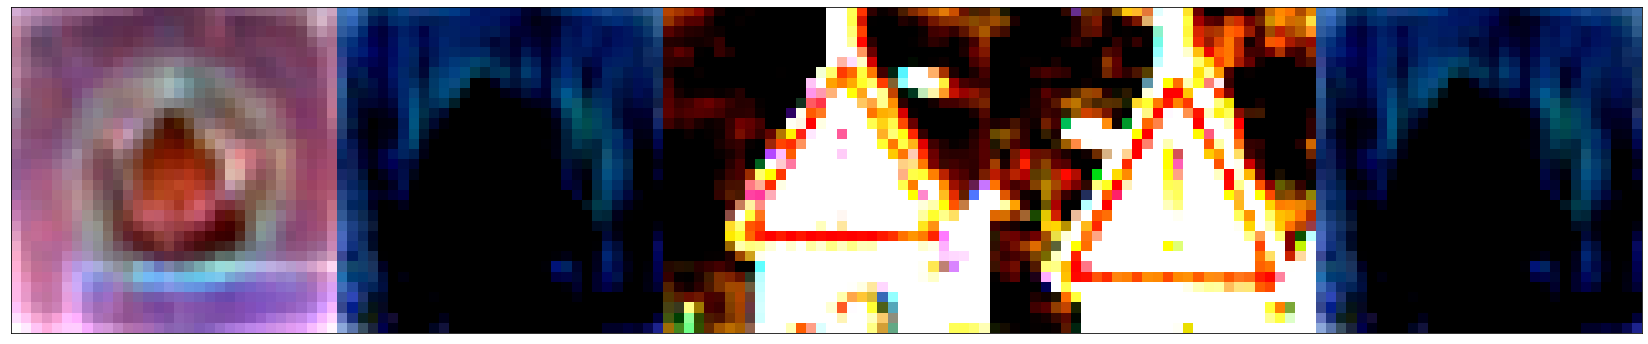

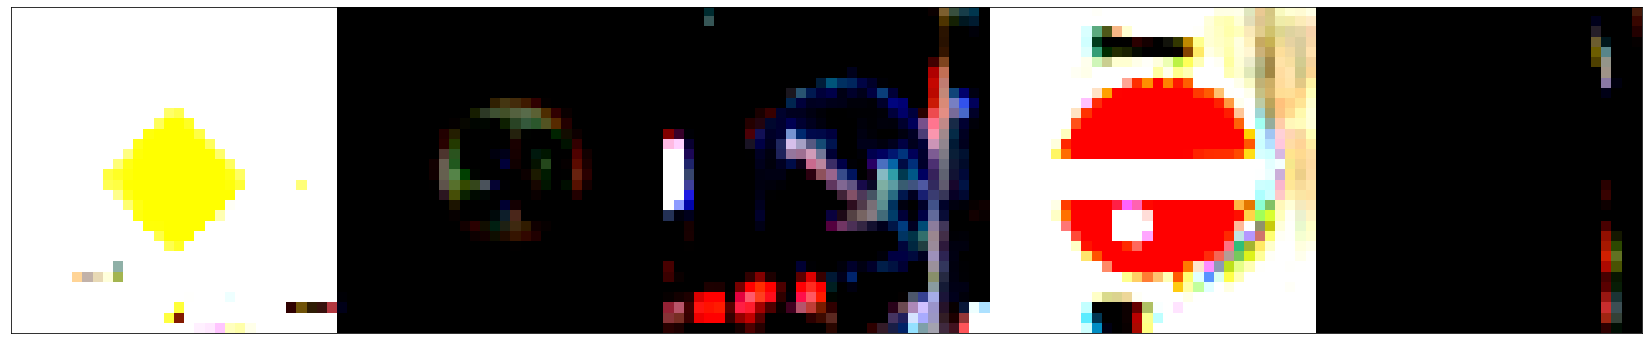

In [5]:
correct_img= 5
incorrect_img = 5

# Set the model to be used
model_name = 'new_impl'

#Define the name of file in which you want to store train acc, val, acc_loss, val_loss line by line fr each data pickle
result_file='./outputs/model_'+model_name+'.csv'

#set epochs
if(model_name=="new_impl"):
    epoch = 47
elif(model_name=="GoogleNet"):
    epoch = 150
else:
    epoch = 100
    
# Override
epoch = 5

k=0
input_dim = data[k]['x_train'].shape[3]
xtrain =data[k]['x_train']
ytrain=data[k]['y_train']
xval= data[k]['x_val'] 
yval= data[k]['y_val'] 
xtest=data[k]['x_test'] 
ytest=data[k]['y_test'] 
#Define a new model instance  
model_instance=Model(input_dim,model_name)

#Compile the model
model_instance.compile_model()

#Train the model
fit_history=model_instance.train_model(xtrain, ytrain, xval, yval, epoch=epoch)

#Evaluate the model
predict = model_instance.evaluate_model(xtest,ytest)

# predicted labels  
pred_label= model_instance.predict_label(xtest)


#Create a new file and start saving data 
pd.DataFrame.from_dict(fit_history.history).to_csv(result_file)

#Display incorrectly classified examples
model_instance.show_incorrect_examples(pred_label,xtest,ytest, correct_img)

#Display correctly classified examples      
model_instance.show_correct_examples(pred_label,xtest,ytest, incorrect_img)  
#defines file name to save the model state  
model_filename='./trained_models/model_'+model_name+'_data'

model_instance.save(model_filename)


## Testing Accuracy

In [6]:
if(model_name=="GoogleNet"):
    print("Accuracy: %.2f%%" %(predict*100))
else:
    print("Accuracy: %.2f%%" %(predict[1]*100))

Accuracy: 94.47%


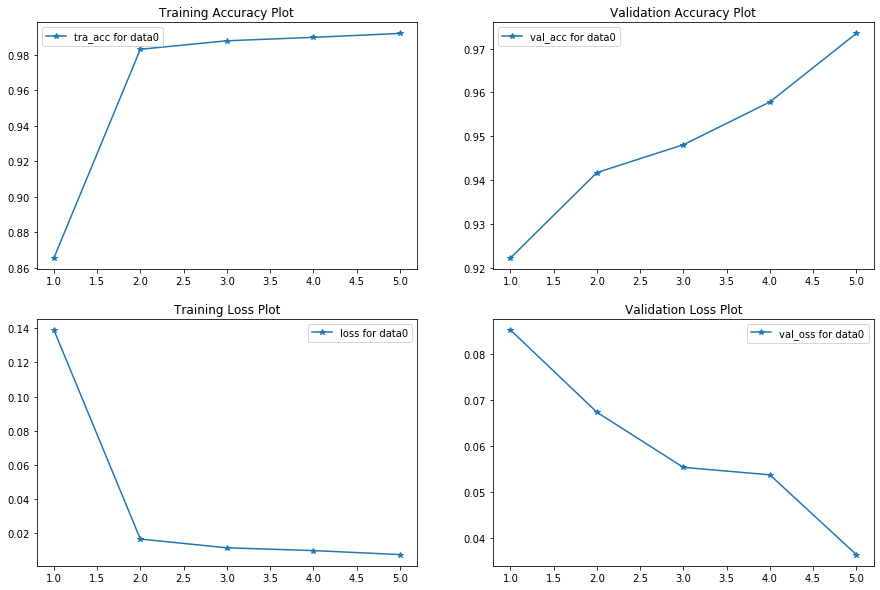

In [7]:
## Dsiplay Accuracy plot, loss plot for training data as well as validation data
#Defines the name of file from which data is to bread
result_file='model_'+model_name+'.csv'

plt.figure(figsize=(15,10))

y = pd.read_csv(result_file)
plt.subplot(2,2,1)

if(model_name=="GoogleNet"):
    #Plot training accuracy and validation accuracy
    plt.plot(np.arange(1,epoch+1), y['val_output_accuracy'], marker='*', label = 'tra_acc for data')

    plt.title('Training Accuracy Plot')
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot(np.arange(1,epoch+1), y['auxilliary_output_1_accuracy'], marker='*', label = 'val_acc for data')  
    plt.title('Validation Accuracy Plot')
    plt.legend()
    
    
else:
    try:
        #Plot training accuracy and validation accuracy
        plt.plot(np.arange(1,epoch+1), y['accuracy'], marker='*', label = 'tra_acc for data'+ str(i))

        plt.title('Training Accuracy Plot')
        plt.legend()

        plt.subplot(2,2,2)
        plt.plot(np.arange(1,epoch+1), y['val_accuracy'], marker='*', label = 'val_acc for data'+ str(i))  
        plt.title('Validation Accuracy Plot')
        plt.legend()
    except:
            #Plot training accuracy and validation accuracy
        plt.plot(np.arange(1,epoch+1), y['acc'], marker='*', label = 'tra_acc for data'+ str(i))

        plt.title('Training Accuracy Plot')
        plt.legend()

        plt.subplot(2,2,2)
        plt.plot(np.arange(1,epoch+1), y['val_acc'], marker='*', label = 'val_acc for data'+ str(i))  
        plt.title('Validation Accuracy Plot')
        plt.legend()

#Plot training loss and validation loss
plt.subplot(2,2,3)
plt.plot(np.arange(1,epoch+1), y['loss'], marker= '*', label = 'loss for data'+ str(i))  
plt.title('Training Loss Plot')
plt.legend()


plt.subplot(2,2,4)
plt.plot(np.arange(1,epoch+1), y['val_loss'], marker= '*',label = 'val_oss for data'+ str(i)) 
plt.title('Validation Loss Plot')
plt.legend()